# 0. Install and Import Dependencies

In [1]:
%pip list

Package            Version
------------------ -------
asttokens          2.1.0
backcall           0.2.0
colorama           0.4.6
comm               0.2.2
debugpy            1.6.3
decorator          5.1.1
entrypoints        0.4
exceptiongroup     1.2.0
executing          1.2.0
importlib_metadata 7.1.0
ipykernel          6.17.0
ipython            8.6.0
jedi               0.18.1
jupyter_client     7.4.4
jupyter_core       4.11.2
matplotlib-inline  0.1.6
nest-asyncio       1.5.6
packaging          24.0
parso              0.8.3
pickleshare        0.7.5
pip                23.3.1
platformdirs       4.2.0
prompt-toolkit     3.0.32
psutil             5.9.4
pure-eval          0.2.2
Pygments           2.13.0
python-dateutil    2.9.0
pywin32            305
pyzmq              24.0.1
setuptools         68.2.2
six                1.16.0
stack-data         0.6.0
tornado            6.2
traitlets          5.5.0
typing_extensions  4.11.0
wcwidth            0.2.5
wheel              0.41.2
zipp             

In [2]:
%pip install opencv-python matplotlib imageio gdown tensorflow

     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     -------------------------------------- 162.8/162.8 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
     ---------------------------------------- 46.2/46.2 kB 2.4 MB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 38.6/38.6 MB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 7.7/7.7 MB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 313.5/313.5 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 377.0/377.0 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 188.2/188.2 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 2.2/2.2 MB 3.9 MB/s eta 0:00:00
   --------------------

In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

2024-04-23 10:20:52.029287: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 10:20:52.029384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 10:20:52.150296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [6]:
import gdown

In [7]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=99b609a0-200c-49f5-af76-4fba57fc9f0b
To: /kaggle/working/data.zip
100%|██████████| 423M/423M [00:02<00:00, 198MB/s]  


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [8]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [9]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [10]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [11]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [12]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [13]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [14]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [15]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [16]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [17]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [18]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

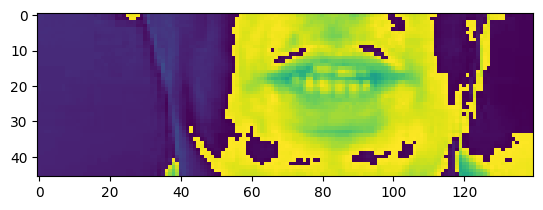

In [19]:
plt.imshow(frames[40])

In [20]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [21]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

# 2. Create Data Pipeline

In [22]:
from matplotlib import pyplot as plt

In [23]:
def load_a(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [32]:
def load_d(path: str):
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    file_name = path.split('/')[-1].split('.')[0]
    v_path = '/kaggle/working/data/s1'
    video_path = os.path.join(v_path,f'{file_name}.mpg')
    a_path = '/kaggle/working/data/alignments/s1'
    alignment_path = os.path.join(a_path,f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_a(alignment_path)

    return frames, alignments

In [33]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_d, [path], (tf.float32, tf.int64))
    return result

In [34]:
data = tf.data.Dataset.list_files('/kaggle/working/data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [35]:
len(test)

50

In [36]:
frames, alignments = data.as_numpy_iterator().next()

In [37]:
len(frames)

2

In [38]:
sample = data.as_numpy_iterator()

In [39]:
val = sample.next(); val[0]

array([[[[[1.2893064 ],
          [1.2893064 ],
          [1.2893064 ],
          ...,
          [0.        ],
          [0.07367466],
          [0.07367466]],

         [[1.2893064 ],
          [1.2893064 ],
          [1.2893064 ],
          ...,
          [0.        ],
          [0.11051198],
          [0.07367466]],

         [[1.2524692 ],
          [1.2524692 ],
          [1.2524692 ],
          ...,
          [0.11051198],
          [0.07367466],
          [0.07367466]],

         ...,

         [[0.88409585],
          [0.88409585],
          [0.8472585 ],
          ...,
          [9.061982  ],
          [9.09882   ],
          [9.025146  ]],

         [[0.88409585],
          [0.88409585],
          [0.8472585 ],
          ...,
          [8.877796  ],
          [8.95147   ],
          [8.877796  ]],

         [[0.88409585],
          [0.88409585],
          [0.8472585 ],
          ...,
          [8.914633  ],
          [9.135657  ],
          [8.877796  ]]],


        [[[1.2156

In [40]:
#imageio.mimsave('./animation.gif', val[0][0], fps=10)

In [41]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
#plt.imshow(val[0][0][35])

In [42]:
#tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

# 3. Design the Deep Neural Network

In [43]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [44]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [45]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 75, 23, 70, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                        

In [47]:
5*17*75

6375

In [48]:
yhat = model.predict(val[0])

1/1 [==============================] - 4s 4s/step


In [49]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'888888888888888888888888888888888888888888888888888888888888888888888nnnnnn'>

In [50]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'888888888888888888888888888888888888888888888888888888888888888888888nnnnnn'>

In [51]:
model.input_shape

(None, 75, 46, 140, 1)

In [52]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [53]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [54]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [55]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [56]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [57]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [58]:
schedule_callback = LearningRateScheduler(scheduler)

In [59]:
example_callback = ProduceExample(test)

In [61]:
model.fit(train, validation_data=test, epochs=50, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/50
155/450 [=========>....................] - ETA: 3:28 - loss: 80.7299

[mpeg1video @ 0x7b869c011100] ac-tex damaged at 22 17
[mpeg1video @ 0x7b869c011100] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 76.6167

[mpeg1video @ 0x7b8520060240] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8520060240] Warning MVs not available
[mpeg1video @ 0x7b86a8088080] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86a8088080] Warning MVs not available


1/1 [==============================] - 2s 2s/step
Original: set white at b eight please
Prediction: la e e e o o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white in p nine again
Prediction: la e e e o o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 747s 2s/step - loss: 76.6167 - val_loss: 69.2563 - lr: 1.0000e-04
Epoch 2/50
404/450 [=========================>....] - ETA: 32s - loss: 70.3332

[mpeg1video @ 0x7b8518099280] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8518099280] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 70.1983

[mpeg1video @ 0x7b854002c740] ac-tex damaged at 22 17
[mpeg1video @ 0x7b854002c740] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: lay green in z five again
Prediction: la e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue at h zero please
Prediction: la e e e e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 546s 1s/step - loss: 70.1983 - val_loss: 65.9654 - lr: 1.0000e-04
Epoch 3/50
146/450 [========>.....................] - ETA: 3:36 - loss: 67.3852

[mpeg1video @ 0x7b86a4236f80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86a4236f80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 66.5412

[mpeg1video @ 0x7b83849d5800] ac-tex damaged at 22 17
[mpeg1video @ 0x7b83849d5800] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: bin green in n two please
Prediction: la e e i e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue at q six please
Prediction: la e e i e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 547s 1s/step - loss: 66.5412 - val_loss: 61.4659 - lr: 1.0000e-04
Epoch 4/50
311/450 [===================>..........] - ETA: 1:38 - loss: 64.1036

[mpeg1video @ 0x7b868c041980] ac-tex damaged at 22 17
[mpeg1video @ 0x7b868c041980] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 63.7668

[mpeg1video @ 0x7b850c085580] ac-tex damaged at 22 17
[mpeg1video @ 0x7b850c085580] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: bin blue by z eight now
Prediction: la e e t e ea
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place sp blue at i six please
Prediction: la e e t e eo
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 543s 1s/step - loss: 63.7668 - val_loss: 59.6824 - lr: 1.0000e-04
Epoch 5/50
 83/450 [====>.........................] - ETA: 4:19 - loss: 62.7183

[mpeg1video @ 0x7b8570070800] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8570070800] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 61.8918

[mpeg1video @ 0x7b869c0b3600] ac-tex damaged at 22 17
[mpeg1video @ 0x7b869c0b3600] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: place green with e six now
Prediction: la re t e eon
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green with a one again
Prediction: la re t e eon
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 61.8918 - val_loss: 57.3052 - lr: 1.0000e-04
Epoch 6/50
 75/450 [====>.........................] - ETA: 4:24 - loss: 60.6051

[mpeg1video @ 0x7b8540024c40] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8540024c40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 59.9827

[mpeg1video @ 0x7b85b403c680] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85b403c680] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: place green in x six now
Prediction: la re n e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue in o seven again
Prediction: la re i e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 59.9827 - val_loss: 55.3668 - lr: 1.0000e-04
Epoch 7/50
 22/450 [>.............................] - ETA: 5:01 - loss: 57.9329

[mpeg1video @ 0x7b85240bdfc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85240bdfc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 56.6482

[mpeg1video @ 0x7b856c09d300] ac-tex damaged at 22 17
[mpeg1video @ 0x7b856c09d300] Warning MVs not available


1/1 [==============================] - 0s 122ms/step
Original: place red with d six please
Prediction: la re t e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red with x eight please
Prediction: la re t e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 56.6482 - val_loss: 53.8826 - lr: 1.0000e-04
Epoch 8/50
450/450 [==============================] - ETA: 0s - loss: 54.7299

[mpeg1video @ 0x7b83b5fd7340] ac-tex damaged at 22 17
[mpeg1video @ 0x7b83b5fd7340] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: lay red with s zero please
Prediction: la re t e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green in d four now
Prediction: la re t e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 538s 1s/step - loss: 54.7299 - val_loss: 51.0177 - lr: 1.0000e-04
Epoch 9/50
354/450 [======================>.......] - ETA: 1:07 - loss: 53.1647

[mpeg1video @ 0x7b8694035bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8694035bc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 52.9330

[mpeg1video @ 0x7b852009a3c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b852009a3c0] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: lay white with f seven soon
Prediction: la re t e e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin white at n zero please
Prediction: la re t e an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 539s 1s/step - loss: 52.9330 - val_loss: 48.4590 - lr: 1.0000e-04
Epoch 10/50
  6/450 [..............................] - ETA: 5:13 - loss: 54.1013

[mpeg1video @ 0x7b857800dc80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b857800dc80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 51.2996

[mpeg1video @ 0x7b86a8536280] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86a8536280] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: lay red with f one soon
Prediction: la re n o o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue in e eight now
Prediction: la re i e ao
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 51.2996 - val_loss: 46.8380 - lr: 1.0000e-04
Epoch 11/50
450/450 [==============================] - ETA: 0s - loss: 49.5548

[mpeg1video @ 0x7b868c07a2c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b868c07a2c0] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: set white at i one soon
Prediction: sen re i n o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red with q five again
Prediction: sen re i ie aon
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 539s 1s/step - loss: 49.5548 - val_loss: 45.8309 - lr: 1.0000e-04
Epoch 12/50
242/450 [===============>..............] - ETA: 2:31 - loss: 47.9269

[mpeg1video @ 0x7b8528f47fc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8528f47fc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 47.6757

[mpeg1video @ 0x7b85700c78c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85700c78c0] Warning MVs not available


1/1 [==============================] - 0s 123ms/step
Original: lay green in s zero please
Prediction: la re i e ae
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green with h eight now
Prediction: la re i o on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 550s 1s/step - loss: 47.6757 - val_loss: 43.7756 - lr: 1.0000e-04
Epoch 13/50
255/450 [================>.............] - ETA: 2:19 - loss: 46.4106

[mpeg1video @ 0x7b8510046580] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8510046580] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 45.9994

[mpeg1video @ 0x7b854004e000] ac-tex damaged at 22 17
[mpeg1video @ 0x7b854004e000] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: place green in k zero please
Prediction: la bre i ie an
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue in b eight please
Prediction: la blue it e plase
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 541s 1s/step - loss: 45.9994 - val_loss: 40.3908 - lr: 1.0000e-04
Epoch 14/50
 98/450 [=====>........................] - ETA: 4:11 - loss: 44.4469

[mpeg1video @ 0x7b869c1f1ac0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b869c1f1ac0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 43.9188

[mpeg1video @ 0x7b8521fa5480] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8521fa5480] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: lay blue in j six now
Prediction: la bre it e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red by x two now
Prediction: la ble b o ow
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 545s 1s/step - loss: 43.9188 - val_loss: 39.3811 - lr: 1.0000e-04
Epoch 15/50
416/450 [==========================>...] - ETA: 23s - loss: 41.7155

[mpeg1video @ 0x7b85b40b3300] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85b40b3300] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 41.6375

[mpeg1video @ 0x7b86ac36c880] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86ac36c880] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: place white by q four now
Prediction: lac blue by o ow
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green at q seven soon
Prediction: lac gre it ie aon
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 543s 1s/step - loss: 41.6375 - val_loss: 36.0313 - lr: 1.0000e-04
Epoch 16/50
 10/450 [..............................] - ETA: 5:20 - loss: 40.1694

[mpeg1video @ 0x7b856407e5c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b856407e5c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 39.4612

[mpeg1video @ 0x7b86980419c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86980419c0] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: bin blue in z zero now
Prediction: la blue it o ow
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white with y five again
Prediction: lac re it ie ain
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 541s 1s/step - loss: 39.4612 - val_loss: 33.9848 - lr: 1.0000e-04
Epoch 17/50
209/450 [============>.................] - ETA: 2:49 - loss: 37.2405

[mpeg1video @ 0x7b83849f6040] ac-tex damaged at 22 17
[mpeg1video @ 0x7b83849f6040] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 37.2716

[mpeg1video @ 0x7b85700d7100] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85700d7100] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: place red with j eight now
Prediction: place re it ie now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red in s four please
Prediction: set re it ie lase
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 538s 1s/step - loss: 37.2716 - val_loss: 30.9212 - lr: 1.0000e-04
Epoch 18/50
423/450 [===========================>..] - ETA: 18s - loss: 34.7622

[mpeg1video @ 0x7b8510046fc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8510046fc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 34.7492

[mpeg1video @ 0x7b855c00ad00] ac-tex damaged at 22 17
[mpeg1video @ 0x7b855c00ad00] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: lay blue by e zero now
Prediction: blt blue by i now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue in q two please
Prediction: slt blue bt o plese
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 534s 1s/step - loss: 34.7492 - val_loss: 29.7064 - lr: 1.0000e-04
Epoch 19/50
 76/450 [====>.........................] - ETA: 4:24 - loss: 33.2651

[mpeg1video @ 0x7b86a406dd00] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86a406dd00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 32.4730

[mpeg1video @ 0x7b8384af5480] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8384af5480] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: bin red in f five soon
Prediction: sen re it ve son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green by b two please
Prediction: plac re by o please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 32.4730 - val_loss: 28.1610 - lr: 1.0000e-04
Epoch 20/50
  4/450 [..............................] - ETA: 5:33 - loss: 32.0413

[mpeg1video @ 0x7b85c0040180] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85c0040180] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 30.4640

[mpeg1video @ 0x7b850c05f100] ac-tex damaged at 22 17
[mpeg1video @ 0x7b850c05f100] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: bin red with n two please
Prediction: set re wit o plase
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue by m one soon
Prediction: biy blue by se son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 30.4640 - val_loss: 25.8132 - lr: 1.0000e-04
Epoch 21/50
111/450 [======>.......................] - ETA: 3:56 - loss: 29.1195

[mpeg1video @ 0x7b8570026c40] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8570026c40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 28.4690

[mpeg1video @ 0x7b869c0b36c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b869c0b36c0] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: lay green in z three soon
Prediction: lan gren it ie son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white in x two please
Prediction: place whie in or please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 28.4690 - val_loss: 23.3600 - lr: 1.0000e-04
Epoch 22/50
446/450 [============================>.] - ETA: 2s - loss: 26.3782

[mpeg1video @ 0x7b8544015080] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8544015080] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 26.3816

[mpeg1video @ 0x7b85c009e100] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85c009e100] Warning MVs not available


1/1 [==============================] - 0s 113ms/step
Original: set white with i eight now
Prediction: lat white it ie gow
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green with b five soon
Prediction: bin red it fve son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 538s 1s/step - loss: 26.3816 - val_loss: 21.0021 - lr: 1.0000e-04
Epoch 23/50
426/450 [===========================>..] - ETA: 16s - loss: 24.3311

[mpeg1video @ 0x7b85200ff880] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85200ff880] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 24.3073

[mpeg1video @ 0x7b855c07e040] ac-tex damaged at 22 17
[mpeg1video @ 0x7b855c07e040] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: lay red by l three again
Prediction: set re by sve ain
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set green in o six now
Prediction: set re it o now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 24.3073 - val_loss: 19.7358 - lr: 1.0000e-04
Epoch 24/50
450/450 [==============================] - ETA: 0s - loss: 22.5810

[mpeg1video @ 0x7b85440171c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85440171c0] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: bin blue with g one soon
Prediction: bin blue with ne son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red by r seven again
Prediction: lay red by se again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 548s 1s/step - loss: 22.5810 - val_loss: 17.2550 - lr: 1.0000e-04
Epoch 25/50
 76/450 [====>.........................] - ETA: 4:25 - loss: 20.9856

[mpeg1video @ 0x7b868c02ab40] ac-tex damaged at 22 17
[mpeg1video @ 0x7b868c02ab40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 20.8846

[mpeg1video @ 0x7b8510007540] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8510007540] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: bin green at n four now
Prediction: bin gren an fr now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red with d four now
Prediction: place gred wit for now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 541s 1s/step - loss: 20.8846 - val_loss: 16.3818 - lr: 1.0000e-04
Epoch 26/50
255/450 [================>.............] - ETA: 2:16 - loss: 19.4548

[mpeg1video @ 0x7b85c00b3b40] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85c00b3b40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 19.4072

[mpeg1video @ 0x7b86a421fec0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86a421fec0] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: place red with x nine again
Prediction: place red with nine again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue in g six please
Prediction: set blue in ix please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 540s 1s/step - loss: 19.4072 - val_loss: 15.8056 - lr: 1.0000e-04
Epoch 27/50
135/450 [========>.....................] - ETA: 3:40 - loss: 18.0057

[mpeg1video @ 0x7b8560052c80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8560052c80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 17.9795

[mpeg1video @ 0x7b86900763c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86900763c0] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set red at b two please
Prediction: set red at wo please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red at j zero now
Prediction: place red an zro now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 535s 1s/step - loss: 17.9795 - val_loss: 13.5697 - lr: 1.0000e-04
Epoch 28/50
410/450 [==========================>...] - ETA: 28s - loss: 17.1050

[mpeg1video @ 0x7b83b5b4e5c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b83b5b4e5c0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 16.9976

[mpeg1video @ 0x7b856c05cb80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b856c05cb80] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set green in v two please
Prediction: set gren in io please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue at a four now
Prediction: set blue at for now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 16.9976 - val_loss: 12.0404 - lr: 1.0000e-04
Epoch 29/50
195/450 [============>.................] - ETA: 2:59 - loss: 15.9071

[mpeg1video @ 0x7b850c00b300] ac-tex damaged at 22 17
[mpeg1video @ 0x7b850c00b300] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 15.7184

[mpeg1video @ 0x7b855c074ec0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b855c074ec0] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: set blue at n four please
Prediction: set blue at for please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white by l nine again
Prediction: lay white by sine again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 535s 1s/step - loss: 15.7184 - val_loss: 11.5241 - lr: 1.0000e-04
Epoch 30/50
  1/450 [..............................] - ETA: 7:45 - loss: 12.9214

[mpeg1video @ 0x7b8694002180] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8694002180] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 14.8020

[mpeg1video @ 0x7b852002dd40] ac-tex damaged at 22 17
[mpeg1video @ 0x7b852002dd40] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: place green with l zero now
Prediction: place gren with er now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue in u nine soon
Prediction: place blue in nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 543s 1s/step - loss: 14.8020 - val_loss: 10.4221 - lr: 1.0000e-04
Epoch 31/50
445/450 [============================>.] - ETA: 3s - loss: 13.3577

[mpeg1video @ 0x7b85b4007200] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85b4007200] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 13.3564

[mpeg1video @ 0x7b852dd7aec0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b852dd7aec0] Warning MVs not available


1/1 [==============================] - 0s 119ms/step
Original: bin green at h zero now
Prediction: bin gren at zer now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red with n three again
Prediction: bin red with thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 541s 1s/step - loss: 13.3564 - val_loss: 9.2253 - lr: 9.0484e-05
Epoch 32/50
126/450 [=======>......................] - ETA: 3:55 - loss: 12.6592

[mpeg1video @ 0x7b85b4094bc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85b4094bc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 12.4783

[mpeg1video @ 0x7b86a40e8e80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86a40e8e80] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: lay red by y eight now
Prediction: lay red by eiht now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white at d two now
Prediction: place white at wo now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 545s 1s/step - loss: 12.4783 - val_loss: 9.2644 - lr: 8.1873e-05
Epoch 33/50
274/450 [=================>............] - ETA: 2:04 - loss: 11.9488

[mpeg1video @ 0x7b8560069000] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8560069000] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 11.6931

[mpeg1video @ 0x7b8690046380] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8690046380] Warning MVs not available


1/1 [==============================] - 0s 130ms/step
Original: bin green with h nine soon
Prediction: bin gren with nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red by b seven again
Prediction: set red by seve again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 539s 1s/step - loss: 11.6931 - val_loss: 8.1150 - lr: 7.4082e-05
Epoch 34/50
450/450 [==============================] - ETA: 0s - loss: 10.9330

[mpeg1video @ 0x7b85b404cc80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85b404cc80] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: bin green at a six now
Prediction: bin gren at six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin green in t six please
Prediction: bin gren in six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 10.9330 - val_loss: 7.8324 - lr: 6.7032e-05
Epoch 35/50
 92/450 [=====>........................] - ETA: 4:10 - loss: 10.8794

[mpeg1video @ 0x7b850c043b40] ac-tex damaged at 22 17
[mpeg1video @ 0x7b850c043b40] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 10.5033

[mpeg1video @ 0x7b85600779c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85600779c0] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: bin red with a two now
Prediction: bin red with two now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue in l two now
Prediction: bin blue in wo now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 534s 1s/step - loss: 10.5033 - val_loss: 7.4151 - lr: 6.0653e-05
Epoch 36/50
450/450 [==============================] - ETA: 0s - loss: 9.8513

[mpeg1video @ 0x7b8528c15480] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8528c15480] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: bin blue at f two now
Prediction: bin blue at two now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red at s six now
Prediction: bin red at six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 533s 1s/step - loss: 9.8513 - val_loss: 6.2098 - lr: 5.4881e-05
Epoch 37/50
450/450 [==============================] - ETA: 0s - loss: 9.4102

[mpeg1video @ 0x7b85100b9640] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85100b9640] Warning MVs not available


1/1 [==============================] - 0s 116ms/step
Original: lay blue at d seven soon
Prediction: lay blue at seve son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green by f nine soon
Prediction: lay gren by nine son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 9.4102 - val_loss: 6.2920 - lr: 4.9659e-05
Epoch 38/50
  3/450 [..............................] - ETA: 5:07 - loss: 8.4456

[mpeg1video @ 0x7b856801abc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b856801abc0] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 8.9920

[mpeg1video @ 0x7b86a806d900] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86a806d900] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: lay blue by r zero please
Prediction: lay blue by zero please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue in g four now
Prediction: set blue in four now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 543s 1s/step - loss: 8.9920 - val_loss: 5.7319 - lr: 4.4933e-05
Epoch 39/50
202/450 [============>.................] - ETA: 2:53 - loss: 8.4302

[mpeg1video @ 0x7b85334a1d80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85334a1d80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 8.5032

[mpeg1video @ 0x7b85c009cbc0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85c009cbc0] Warning MVs not available


1/1 [==============================] - 0s 118ms/step
Original: place white by x eight now
Prediction: place white by eight now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue by e three again
Prediction: lay blue by thre again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 537s 1s/step - loss: 8.5032 - val_loss: 5.9053 - lr: 4.0657e-05
Epoch 40/50
  5/450 [..............................] - ETA: 5:10 - loss: 6.7092

[mpeg1video @ 0x7b852002a240] ac-tex damaged at 22 17
[mpeg1video @ 0x7b852002a240] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 8.0754

[mpeg1video @ 0x7b855c0747c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b855c0747c0] Warning MVs not available


1/1 [==============================] - 0s 124ms/step
Original: bin blue at s two please
Prediction: bin blue at two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay red by r six please
Prediction: lay red by six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 532s 1s/step - loss: 8.0754 - val_loss: 5.0323 - lr: 3.6788e-05
Epoch 41/50
322/450 [====================>.........] - ETA: 1:30 - loss: 7.7183

[mpeg1video @ 0x7b86a4093700] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86a4093700] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 7.7774

[mpeg1video @ 0x7b8534086a00] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8534086a00] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set red with v zero now
Prediction: set red with zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red in l eight now
Prediction: bin red in eight now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 539s 1s/step - loss: 7.7774 - val_loss: 4.8870 - lr: 3.3287e-05
Epoch 42/50
227/450 [==============>...............] - ETA: 2:35 - loss: 7.5185

[mpeg1video @ 0x7b8690062000] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8690062000] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 7.5330

[mpeg1video @ 0x7b8524073540] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8524073540] Warning MVs not available


1/1 [==============================] - 0s 120ms/step
Original: place green at q nine again
Prediction: place gren at nine again
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue by f six now
Prediction: bin blue by six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 534s 1s/step - loss: 7.5330 - val_loss: 4.8941 - lr: 3.0119e-05
Epoch 43/50
450/450 [==============================] - ETA: 0s - loss: 7.2159

[mpeg1video @ 0x7b869c01a2c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b869c01a2c0] Warning MVs not available


1/1 [==============================] - 0s 121ms/step
Original: place blue with d zero please
Prediction: place blue with zero please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place white in x zero now
Prediction: place white in zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 533s 1s/step - loss: 7.2159 - val_loss: 4.0533 - lr: 2.7253e-05
Epoch 44/50
 17/450 [>.............................] - ETA: 4:59 - loss: 7.6242

[mpeg1video @ 0x7b8560090680] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8560090680] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.9188

[mpeg1video @ 0x7b867c06ae00] ac-tex damaged at 22 17
[mpeg1video @ 0x7b867c06ae00] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: lay white at z two please
Prediction: lay white at z two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place sp blue with x zero now
Prediction: place blue with zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 532s 1s/step - loss: 6.9188 - val_loss: 3.8808 - lr: 2.4660e-05
Epoch 45/50
450/450 [==============================] - ETA: 0s - loss: 6.8057

[mpeg1video @ 0x7b856c096200] ac-tex damaged at 22 17
[mpeg1video @ 0x7b856c096200] Warning MVs not available


1/1 [==============================] - 0s 114ms/step
Original: set blue by n eight sp please
Prediction: set blue by n eight please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red by m six now
Prediction: bin red by six now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 534s 1s/step - loss: 6.8057 - val_loss: 3.8585 - lr: 2.2313e-05
Epoch 46/50
307/450 [===================>..........] - ETA: 1:39 - loss: 6.4702

[mpeg1video @ 0x7b850c107d00] ac-tex damaged at 22 17
[mpeg1video @ 0x7b850c107d00] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.4758

[mpeg1video @ 0x7b8384730840] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8384730840] Warning MVs not available


1/1 [==============================] - 0s 115ms/step
Original: set green at p zero now
Prediction: set gren at p zero now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place green with r four now
Prediction: place gren with four now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 6.4758 - val_loss: 4.0887 - lr: 2.0190e-05
Epoch 47/50
 40/450 [=>............................] - ETA: 4:46 - loss: 6.1629

[mpeg1video @ 0x7b8698241300] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8698241300] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.3601

[mpeg1video @ 0x7b8520082340] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8520082340] Warning MVs not available


1/1 [==============================] - 0s 117ms/step
Original: set red with i two now
Prediction: set red with two now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin red by t two please
Prediction: bin red by two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 542s 1s/step - loss: 6.3601 - val_loss: 3.6121 - lr: 1.8268e-05
Epoch 48/50
143/450 [========>.....................] - ETA: 3:37 - loss: 6.3174

[mpeg1video @ 0x7b85c0227c80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b85c0227c80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.2389

[mpeg1video @ 0x5870e2c7a040] ac-tex damaged at 22 17
[mpeg1video @ 0x5870e2c7a040] Warning MVs not available


1/1 [==============================] - 0s 111ms/step
Original: lay green with g two now
Prediction: lay gren with two now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set blue by u one soon
Prediction: set blue by u one son
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 544s 1s/step - loss: 6.2389 - val_loss: 3.4050 - lr: 1.6530e-05
Epoch 49/50
332/450 [=====================>........] - ETA: 1:23 - loss: 6.0798

[mpeg1video @ 0x7b8568024b80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b8568024b80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 6.1422

[mpeg1video @ 0x7b869800c5c0] ac-tex damaged at 22 17
[mpeg1video @ 0x7b869800c5c0] Warning MVs not available


1/1 [==============================] - 0s 112ms/step
Original: bin white by n two now
Prediction: bin white by two now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red at sp p six please
Prediction: place red at p six please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 536s 1s/step - loss: 6.1422 - val_loss: 3.3016 - lr: 1.4957e-05
Epoch 50/50
 58/450 [==>...........................] - ETA: 4:33 - loss: 6.0157

[mpeg1video @ 0x7b852dcbab80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b852dcbab80] Warning MVs not available


450/450 [==============================] - ETA: 0s - loss: 5.9490

[mpeg1video @ 0x7b857808cf80] ac-tex damaged at 22 17
[mpeg1video @ 0x7b857808cf80] Warning MVs not available


1/1 [==============================] - 0s 112ms/step
Original: place blue by p two now
Prediction: place blue by p two now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place blue at i four now
Prediction: place blue at four now
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 535s 1s/step - loss: 5.9490 - val_loss: 3.5777 - lr: 1.3534e-05


# 5. Make a Prediction 

In [63]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=45b44c5c-2796-447f-9975-7790b8176e75
To: /kaggle/working/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:00<00:00, 276MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [ ]:
from tensorflow.keras.optimizers import legacy

# Load the model with a legacy optimizer
model.load_weights('/kaggle/working/models/checkpoint', compile=False)

# Re-compile the model with the desired optimizer
optimizer = legacy.Adam()  # or any other legacy optimizer you used before
model.compile(optimizer=optimizer, loss='...', metrics=['...'])


In [79]:
test_data = test.as_numpy_iterator()

In [80]:
sample = test_data.next()

[mpeg1video @ 0x7b86ac17cc40] ac-tex damaged at 22 17
[mpeg1video @ 0x7b86ac17cc40] Warning MVs not available


In [ ]:
yhat = model.predict(sample[0])

In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [70]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red in nine again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set green with four please'>]

# Test on a Video

In [81]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

In [82]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [83]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 0s 73ms/step


In [84]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [85]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at nine again'>]